In [205]:
import pandas as pd
import numpy as np

In [206]:
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')

In [207]:
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [208]:
generation_data .describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [209]:
generation_data.isna().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [210]:
weather_data.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [211]:
weather_data.isna().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [212]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format='%d-%m-%Y %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

In [213]:
df_solar_power = pd.merge(generation_data, weather_data, on ='DATE_TIME', how ='left' )

In [214]:
df_solar_power

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [219]:
df_solar_power["DATE"] = pd.to_datetime(df_solar_power["DATE_TIME"]).dt.date
df_solar_power["TIME"] = pd.to_datetime(df_solar_power["DATE_TIME"]).dt.time
df_solar_power['DAY'] = pd.to_datetime(df_solar_power['DATE_TIME']).dt.day
df_solar_power['MONTH'] = pd.to_datetime(df_solar_power['DATE_TIME']).dt.month


In [220]:

# add hours and minutes for ml models
df_solar_power['HOURS'] = pd.to_datetime(df_solar_power['DATE_TIME'],format='%Y-%m-%d %H:%M:%S').dt.hour
df_solar_power['MINUTES'] = pd.to_datetime(df_solar_power['DATE_TIME'],format='%Y-%m-%d %H:%M:%S').dt.minute


# add date as string column
df_solar_power["DATE_STRING"] = df_solar_power["DATE"].astype(str) # add column with date as string
df_solar_power["HOURS"] = df_solar_power["HOURS"].astype(str)
df_solar_power["TIME"] = df_solar_power["TIME"].astype(str)

In [221]:
df_solar_power

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,YEAR,TIME,DATE,HOURS,MINUTES,DATE_STRING
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,17,6,2020,23:45:00,2020-06-17,23,45,2020-06-17
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,17,6,2020,23:45:00,2020-06-17,23,45,2020-06-17
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,17,6,2020,23:45:00,2020-06-17,23,45,2020-06-17
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,17,6,2020,23:45:00,2020-06-17,23,45,2020-06-17


In [222]:
df_solar_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68778 non-null  datetime64[ns]
 1   PLANT_ID_x           68778 non-null  int64         
 2   SOURCE_KEY_x         68778 non-null  object        
 3   DC_POWER             68778 non-null  float64       
 4   AC_POWER             68778 non-null  float64       
 5   DAILY_YIELD          68778 non-null  float64       
 6   TOTAL_YIELD          68778 non-null  float64       
 7   PLANT_ID_y           68774 non-null  float64       
 8   SOURCE_KEY_y         68774 non-null  object        
 9   AMBIENT_TEMPERATURE  68774 non-null  float64       
 10  MODULE_TEMPERATURE   68774 non-null  float64       
 11  IRRADIATION          68774 non-null  float64       
 12  DAY                  68778 non-null  int32         
 13  MONTH                68778 non-

In [223]:
df_solar_power.isna().sum()


DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             4
SOURCE_KEY_y           4
AMBIENT_TEMPERATURE    4
MODULE_TEMPERATURE     4
IRRADIATION            4
DAY                    0
MONTH                  0
YEAR                   0
TIME                   0
DATE                   0
HOURS                  0
MINUTES                0
DATE_STRING            0
dtype: int64

In [303]:
df_solar_power['AMBIENT_TEMPERATURE'].fillna(df_solar_power['AMBIENT_TEMPERATURE'].mean(), inplace = True)
df_solar_power['MODULE_TEMPERATURE'].fillna(df_solar_power['MODULE_TEMPERATURE'].mean(),  inplace = True)
df_solar_power['IRRADIATION'].fillna(df_solar_power['IRRADIATION'].mean(),  inplace = True)
df_solar_power['PLANT_ID_y'].fillna(df_solar_power['PLANT_ID_y'].mean(),  inplace = True)

In [295]:
df_solar_power

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,...,IRRADIATION,DAY,MONTH,YEAR,TIME,DATE,HOURS,MINUTES,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,...,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15,0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,...,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15,0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,...,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15,0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,...,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15,0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,...,0.0,15,5,2020,00:00:00,2020-05-15,0,0,2020-05-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,...,0.0,17,6,2020,23:45:00,2020-06-17,23,45,2020-06-17,0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,...,0.0,17,6,2020,23:45:00,2020-06-17,23,45,2020-06-17,0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,...,0.0,17,6,2020,23:45:00,2020-06-17,23,45,2020-06-17,0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,...,0.0,17,6,2020,23:45:00,2020-06-17,23,45,2020-06-17,0


In [305]:
df_solar_power['SOURCE_KEY_NUMBER'] = pd.factorize(df_solar_power.SOURCE_KEY_y)[0]

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\surendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


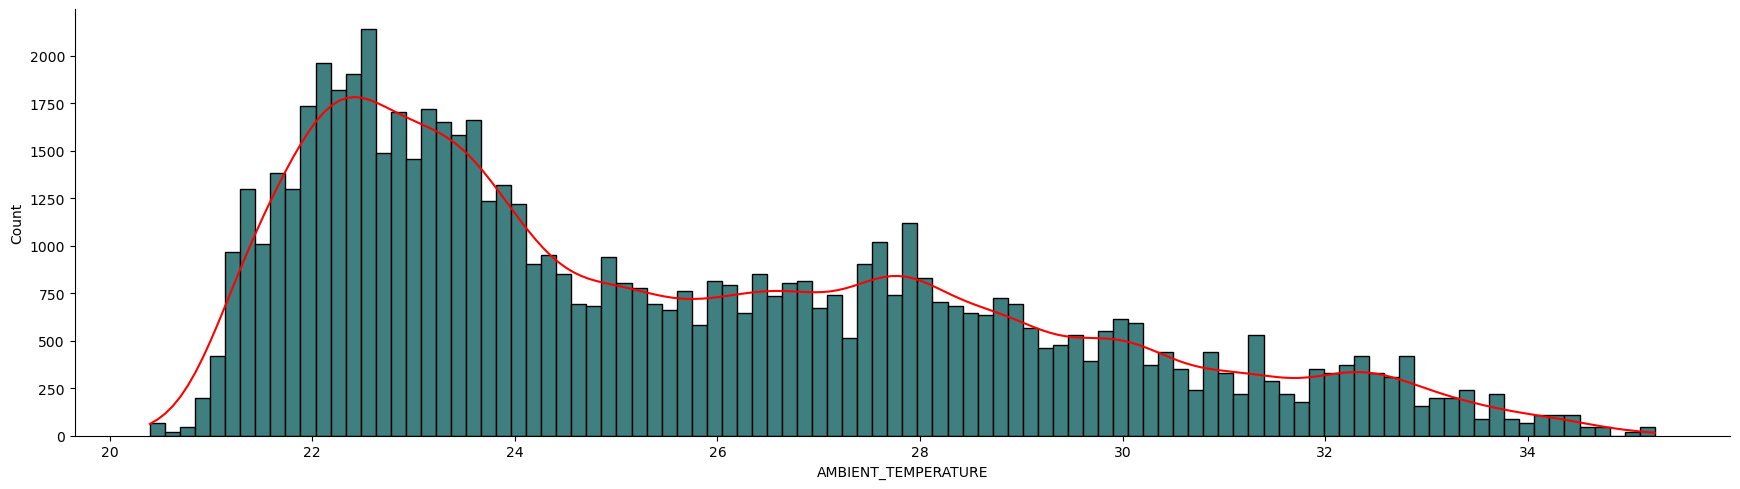

In [297]:


sns.displot(data=df_solar_power, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5)



In [298]:
df_solar_power['DATE'].nunique()

34

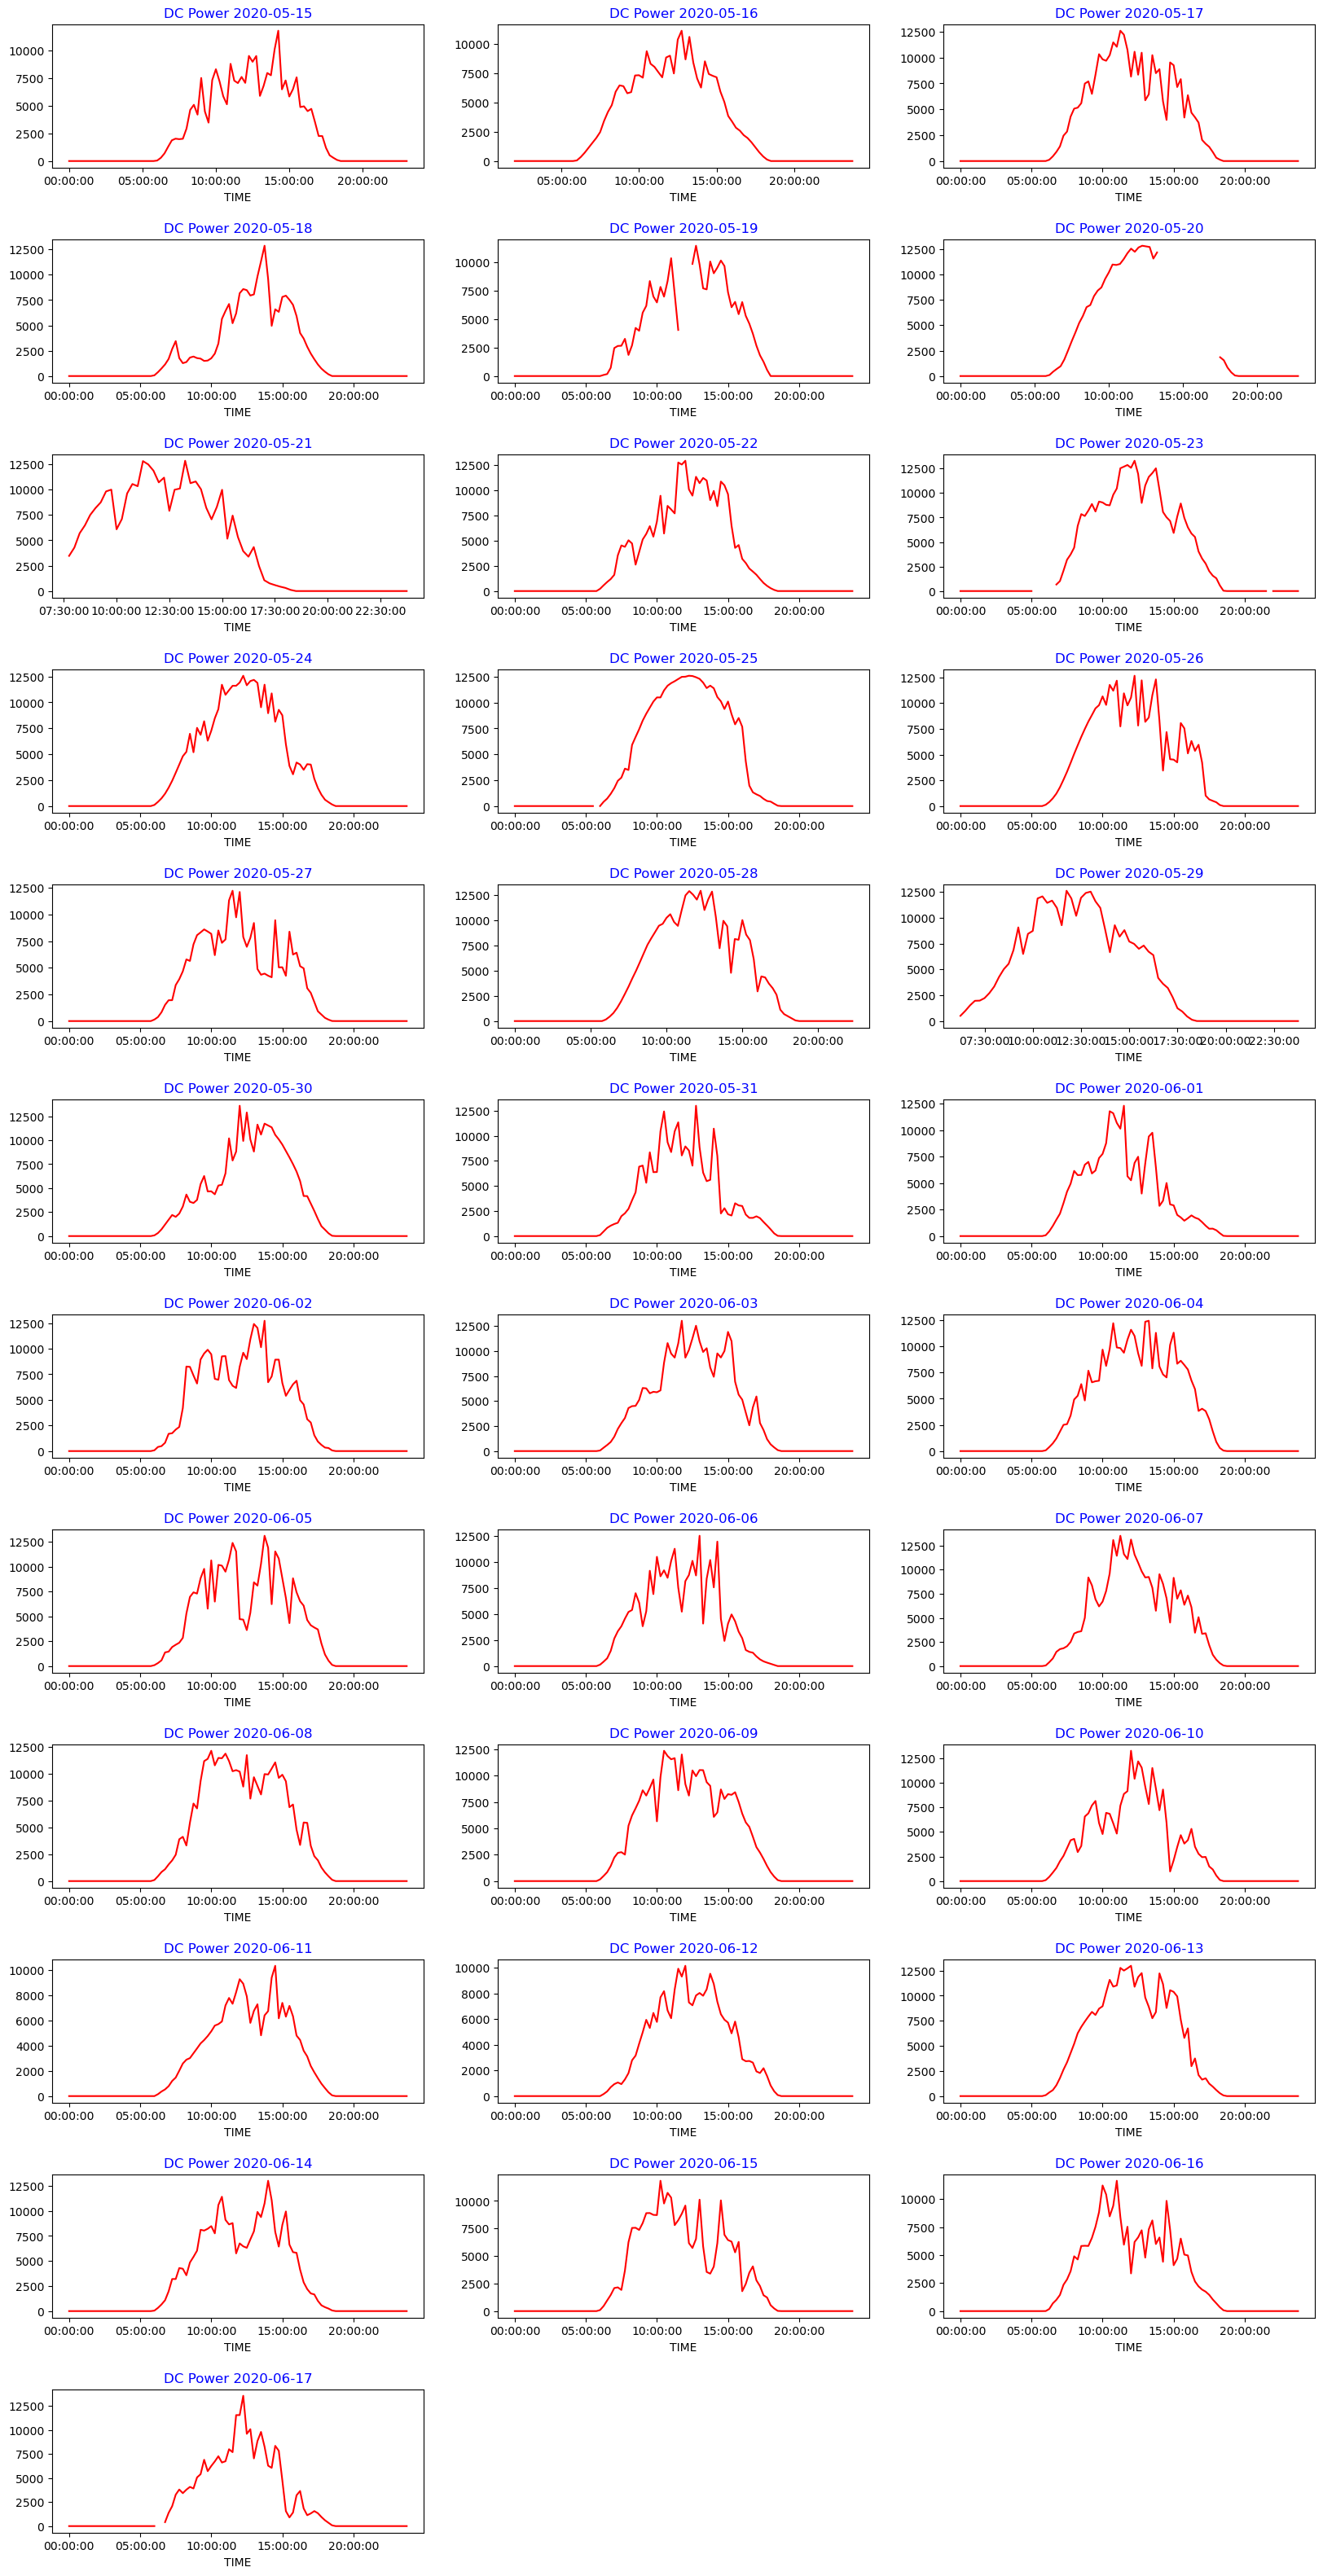

In [299]:
solar_power__dc = df_solar_power.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns 
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_power__dc, row=12, col=3)

Text(0.5, 1.0, 'Daily_DC_power')

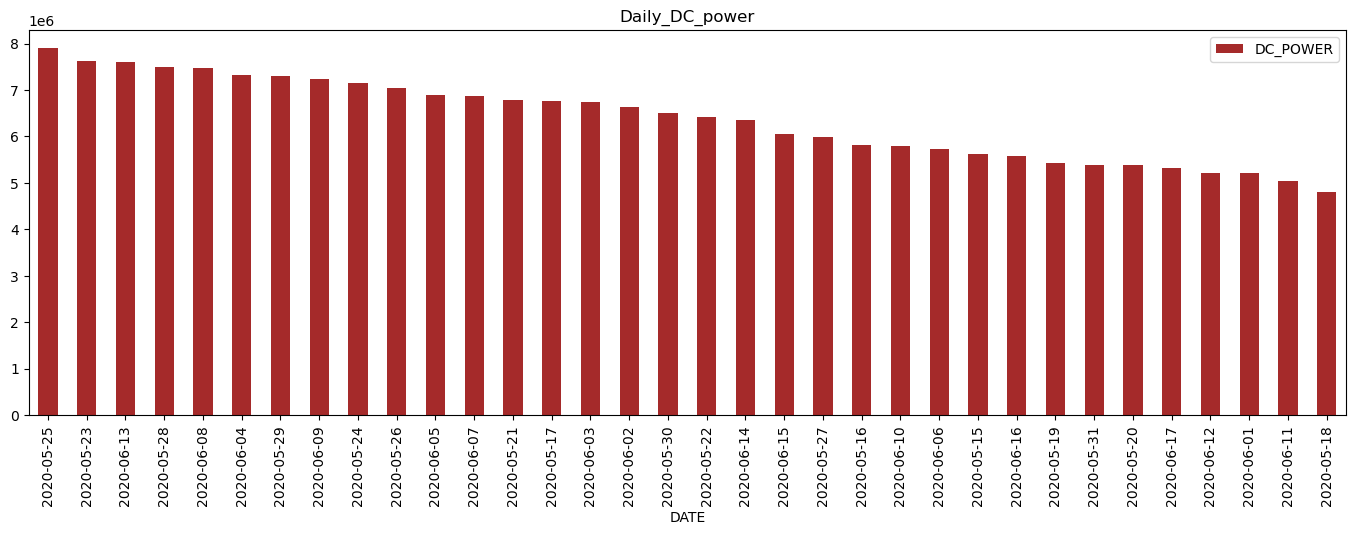

In [262]:
daily_DC = df_solar_power.groupby('DATE')['DC_POWER'].sum()
daily_DC.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='brown')
plt.title('Daily_DC_power')

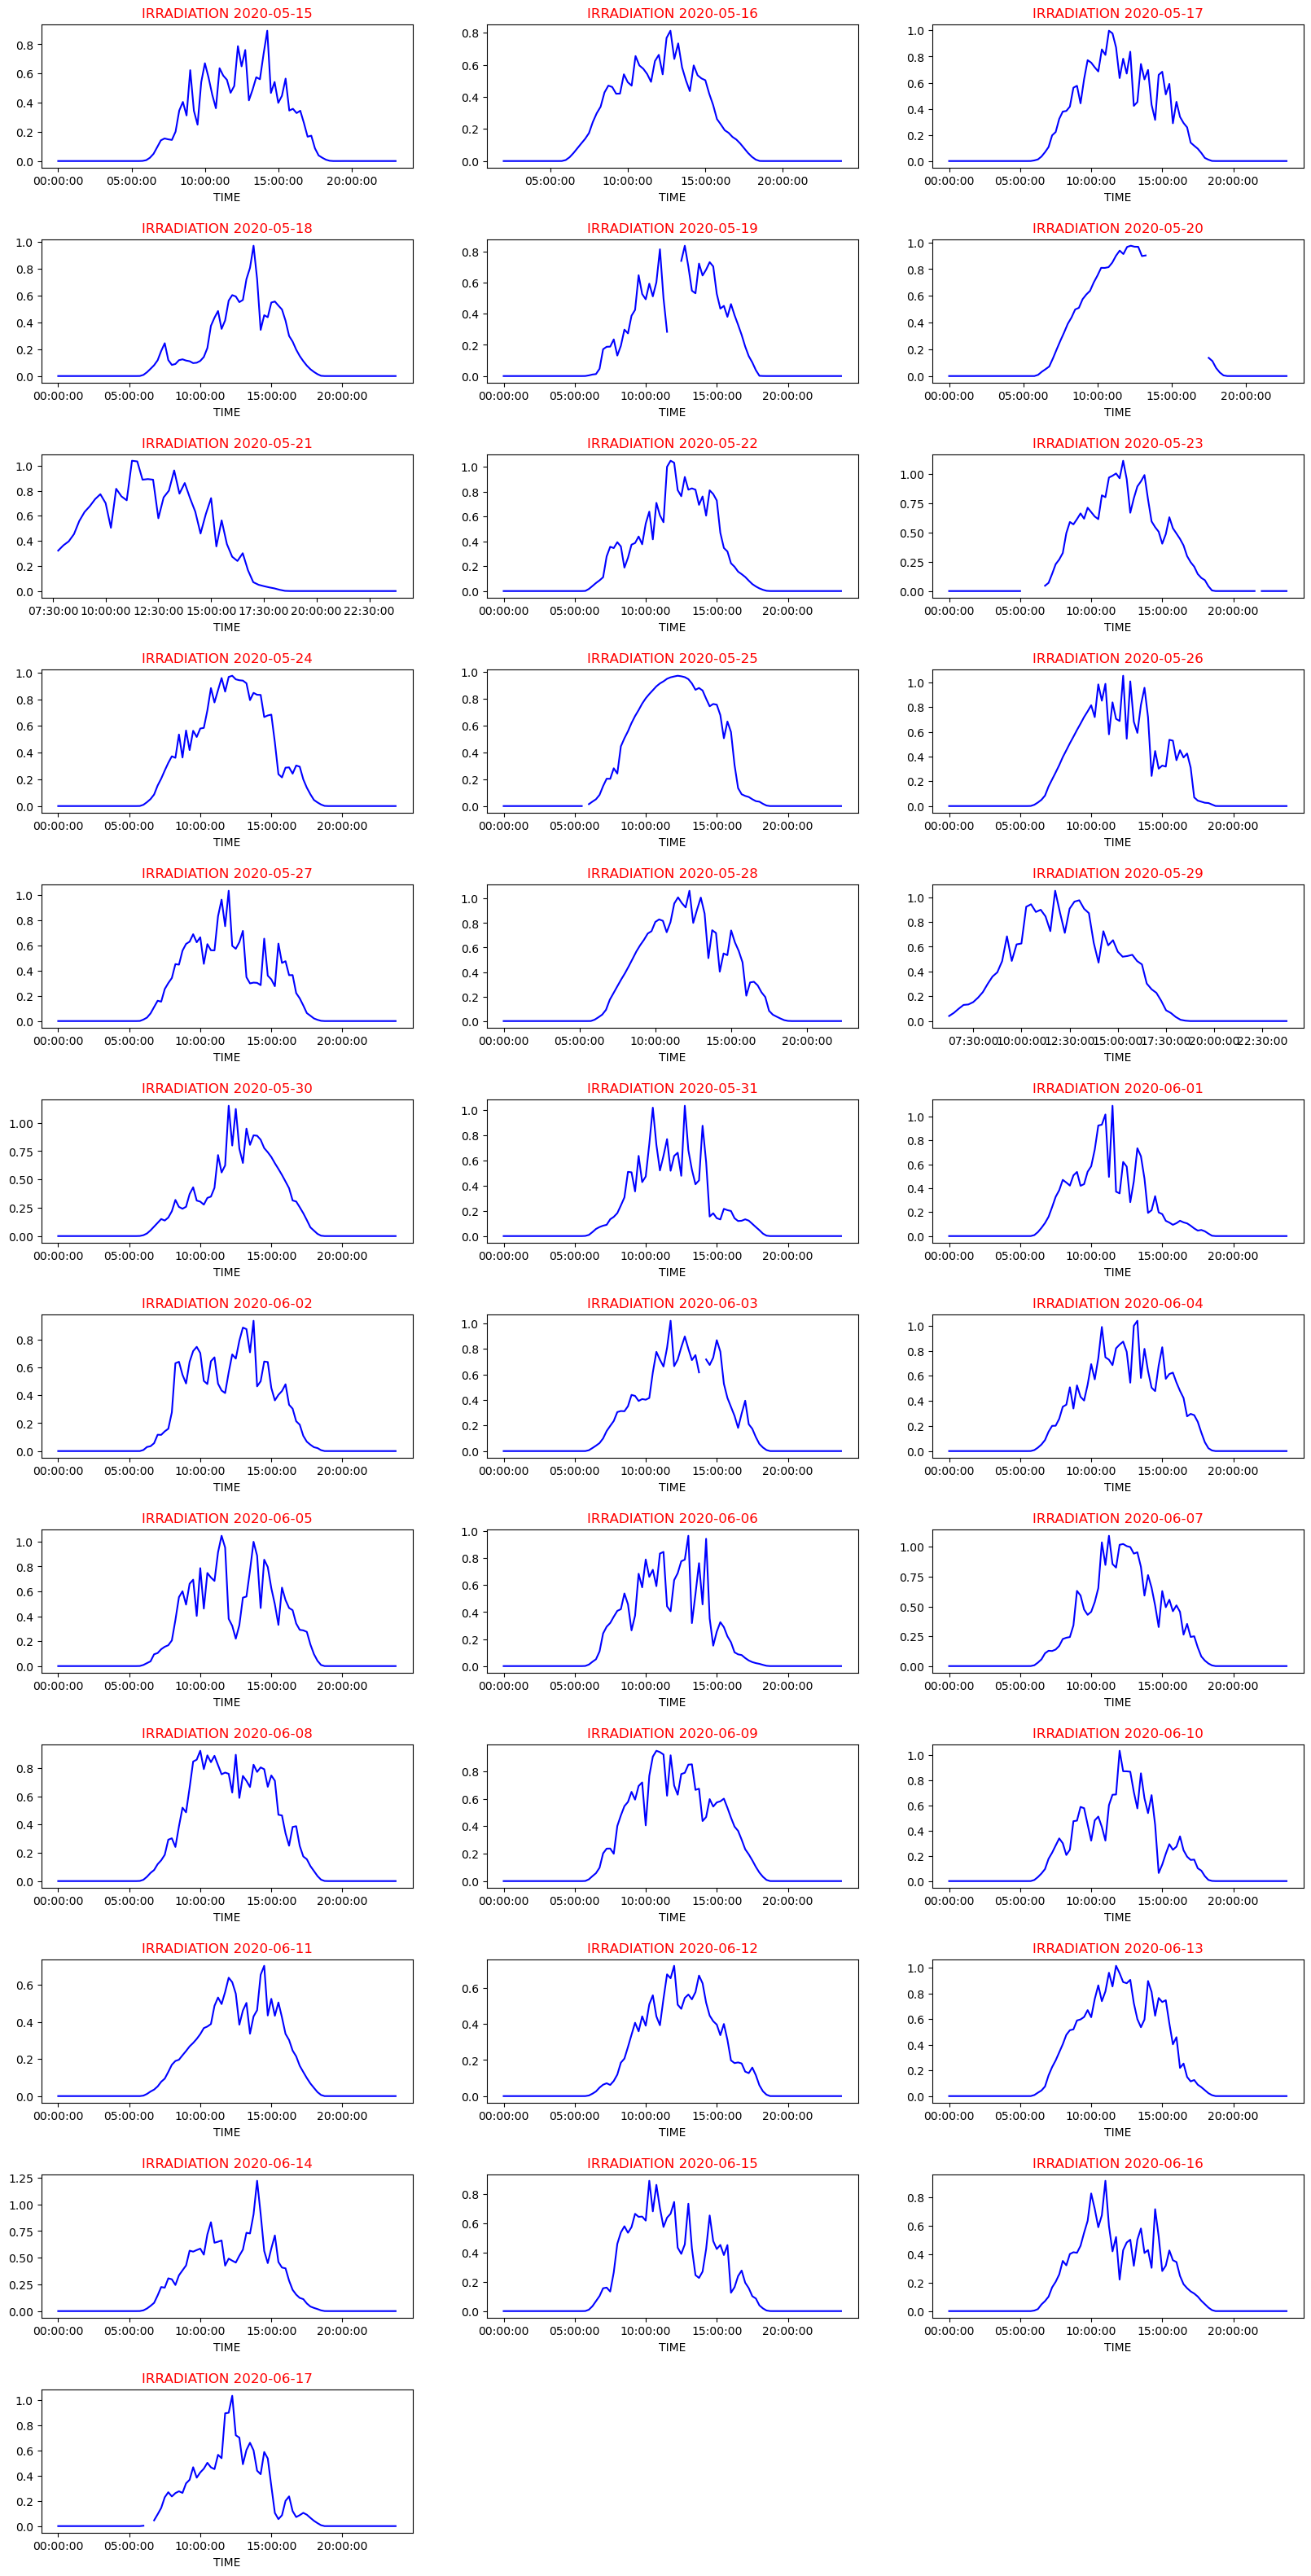

In [263]:
solar_irradiation = df_solar_power.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns 
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

Text(0.5, 1.0, 'Daily_IRR')

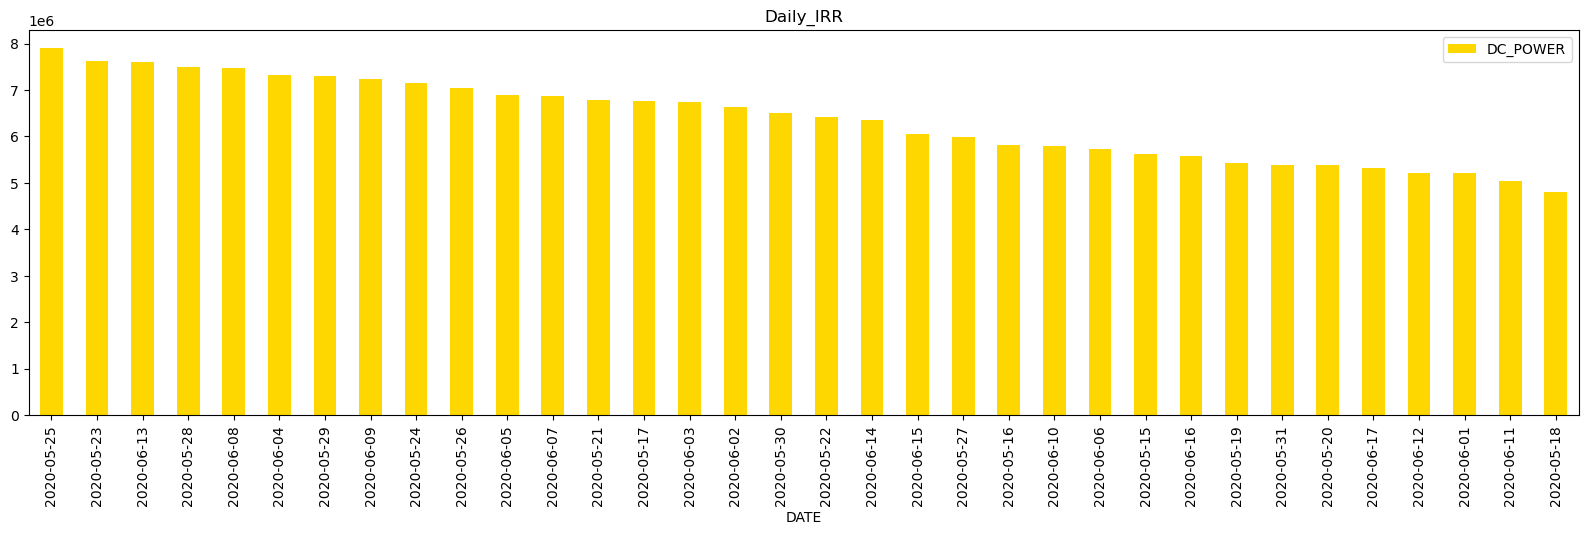

In [267]:
daily_IRR = df_solar_power.groupby('DATE')['IRRADIATION'].sum()
daily_DC.sort_values(ascending=False).plot.bar(figsize=(20,5), legend=True,color='GOLD')
plt.title('Daily_IRR')

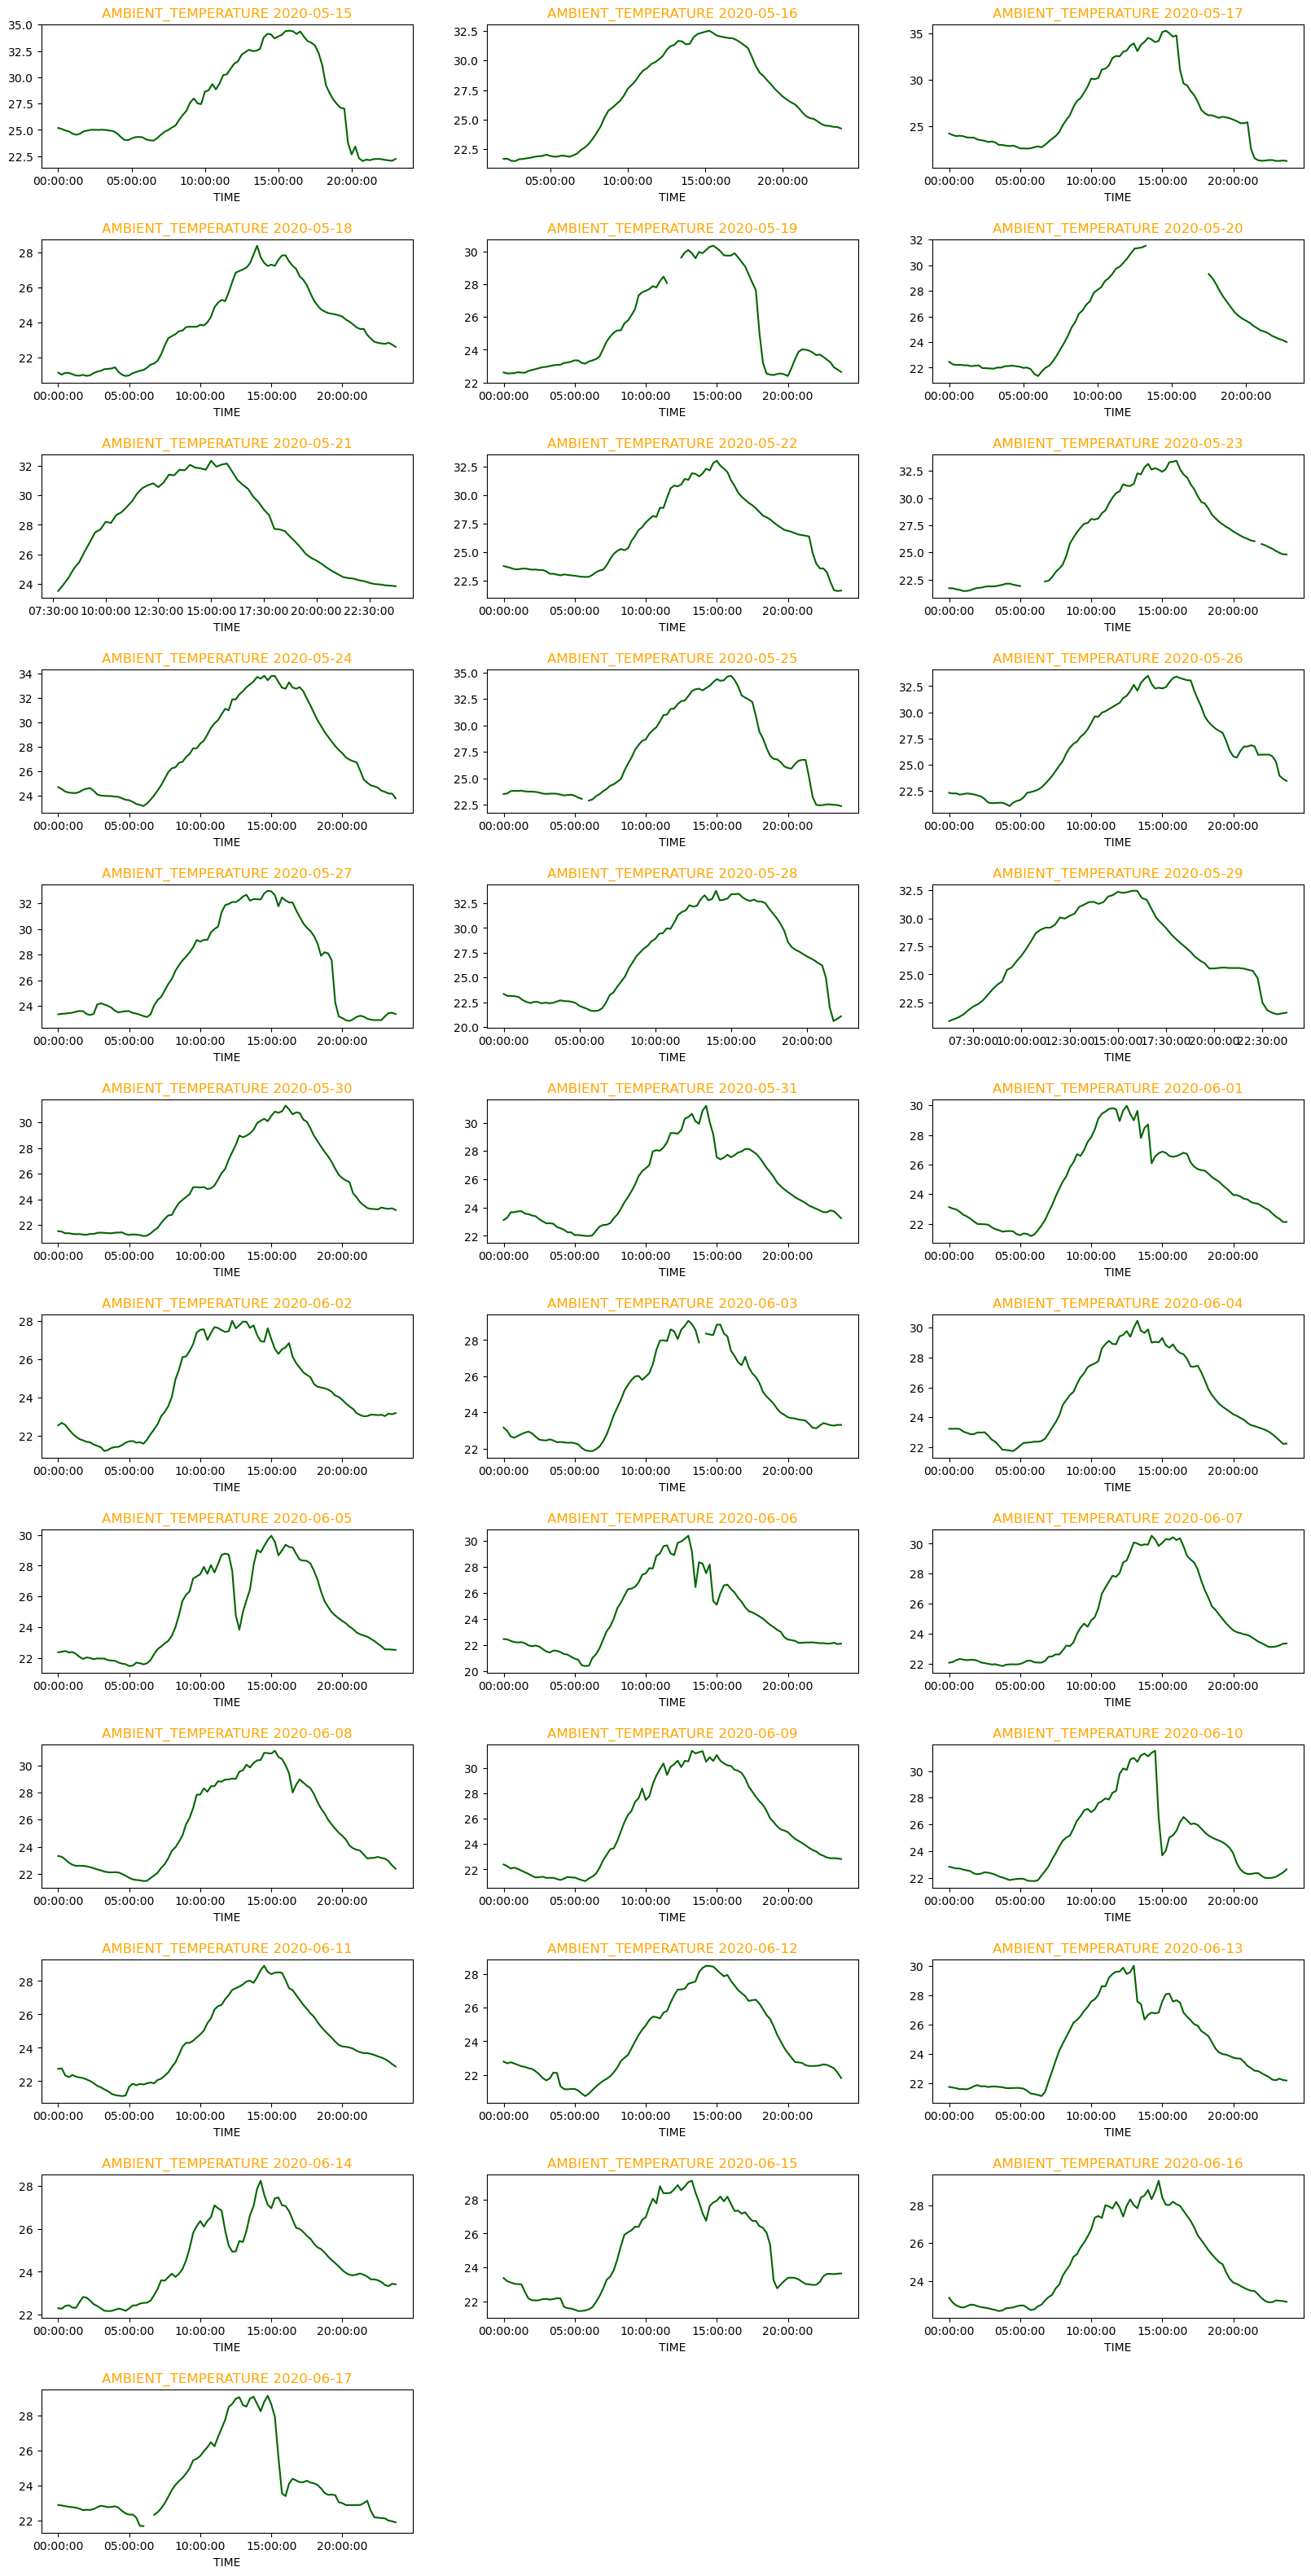

In [272]:
solar_ambient_temp = df_solar_power.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='orange')
        
Daywise_plot(data=solar_ambient_temp, row=12, col=3)

Text(0.5, 1.0, 'AMBIENT_TEMPERATURE')

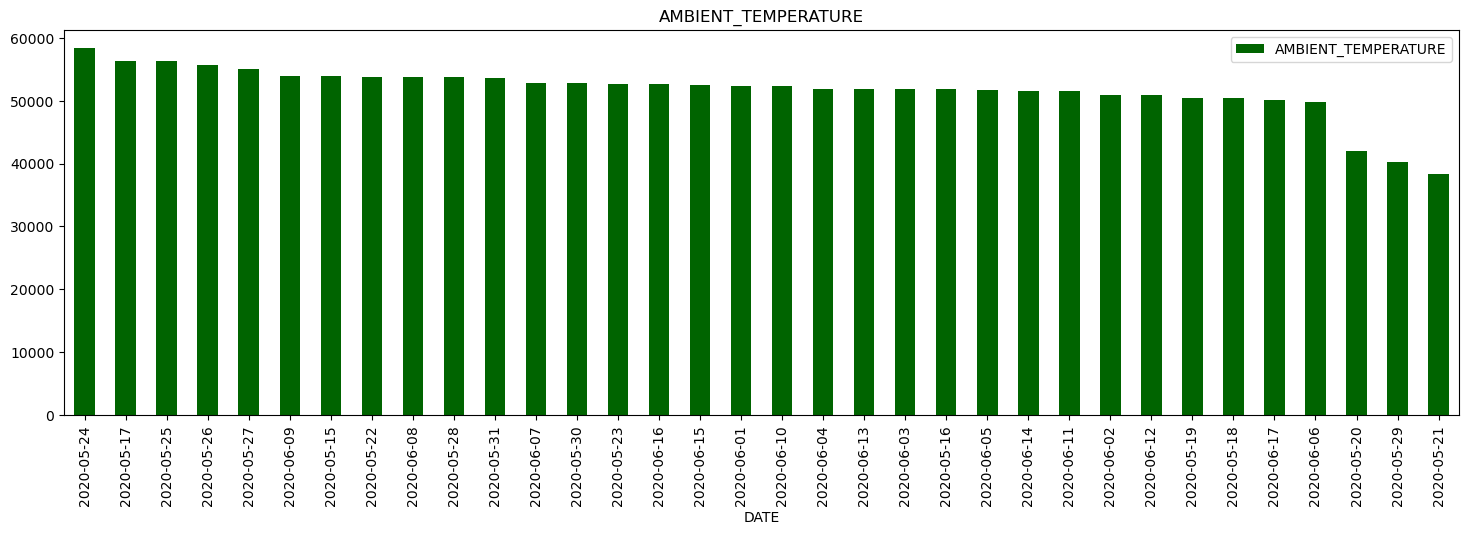

In [285]:
daily_ambient_temp = df_solar_power.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(18,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')


In [310]:
solar_dc_power = df_solar_power[df_solar_power['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar_power[df_solar_power['AC_POWER'] > 0]['AC_POWER'].values

In [326]:
solar_plant_eff =  np.max(solar_dc_power)
solar_plant_eff

14471.125